<a href="https://colab.research.google.com/github/Satwikram/Extending-Existing-Tf-model-with-more-classes/blob/main/Extending_Existing_Tf_model_with_more_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author: Satwik Ram K
### Adding Classes to existing Tensorflow model


### Connecting to Kaggle

In [1]:
from google.colab import files

files.upload()


! mkdir ~/.kaggle


! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
! kaggle datasets download -d alessiocorrado99/animals10

 99% 579M/586M [00:09<00:00, 132MB/s]
100% 586M/586M [00:09<00:00, 62.6MB/s]


In [ ]:
! unzip /content/animals10.zip

### Importing Librarries

In [1]:
import numpy as np #Linear Algebra
import matplotlib.pyplot as plt
import cv2
import os
import pickle
%matplotlib inline
import pandas as pd
from tqdm import tqdm_notebook as tqdm

In [2]:
img_size = (150, 150) #Setting all the images to 150 pixels

### Defining the function to get data

In [3]:
classes = []

In [4]:
def get_data(data_dir):
  data = []
  count = 0
  print(os.path.basename(data_dir))
  folder = os.path.basename(data_dir)
  classes.append(folder)
  print(folder)
  with tqdm(total = len(os.listdir(data_dir))) as pbar:
    for img in os.listdir(data_dir):
      try:
        count += 1
        image_array = cv2.imread(os.path.join(data_dir, img), cv2.IMREAD_COLOR)
        resized_array = cv2.resize(image_array, img_size)
        data.append([resized_array, folder])

      except Exception as e:
        print(e)

  print("Collected",count,"no of images")
  return data

In [5]:
data = get_data('/content/raw-img/cane')

cane
cane


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



Collected 4863 no of images


In [6]:
classes

['cane']

Text(0.5, 1.0, 'cane')

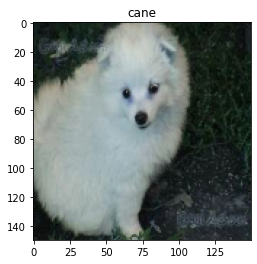

In [7]:
plt.imshow(data[2][0])
plt.title(data[2][1])

In [8]:
data2 = get_data('/content/raw-img/cavallo')

cavallo
cavallo


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



Collected 2623 no of images


In [9]:
classes

['cane', 'cavallo']

Text(0.5, 1.0, 'cavallo')

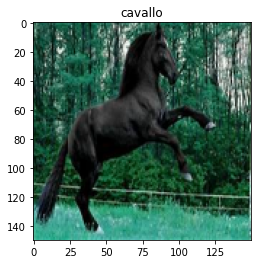

In [10]:
plt.imshow(data2[2][0])
plt.title(data2[2][1])

### Combining the data

In [11]:
dataset = data + data2

In [12]:
len(dataset)

7486

In [13]:
print(dataset[4000][1])
print(dataset[7000][1])

cane
cavallo


### Taking X and Y

In [14]:
X = []
y = []

In [15]:
for i in range(len(dataset)):
  X.append(dataset[i][0])
  y.append(dataset[i][1])

In [16]:
print(len(X))
print(len(y))

7486
7486


### Normalizing the Data

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
X = X / 255.0

### Splitting the data

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 388)


In [24]:
X_train.shape[1:]

(150, 150, 3)

### Building the model

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Activation

In [28]:
def build_model():
  model = Sequential()

  model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = X_train.shape[1:], padding = 'same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.5))

  model.add(Conv2D(256, (3,3), padding = 'same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(2))
  model.add(Activation('sigmoid'))

  return model

In [29]:
model = build_model()

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 150, 150, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 75, 75, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 128)      

In [ ]:
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau